In [13]:
import numpy as np
import matplotlib.pyplot as plt

#**1. Hipotesis $$h(x) = wx$$**

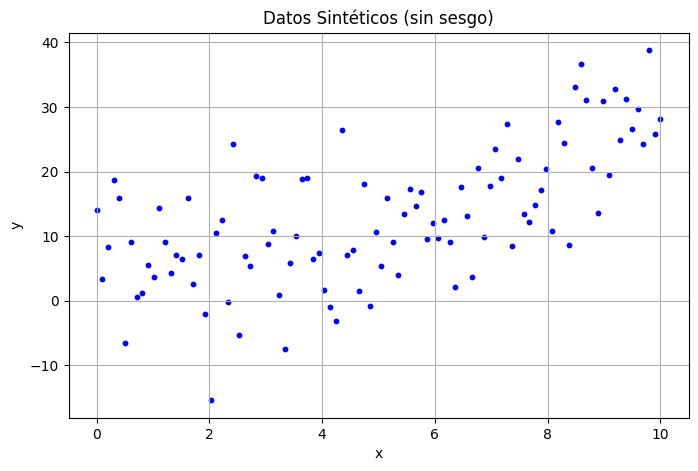

In [62]:
# 1. Generar datos sintéticos
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Para reproducibilidad

x = np.linspace(0, 10, 100)  # 100 puntos entre 0 y 10
true_w = 2.5
noise = np.random.normal(0, 8, size=x.shape)

y = true_w * x + noise  # SIN sesgo

# Graficar datos
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=10)
plt.title('Datos Sintéticos (sin sesgo)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [63]:
# 2. Inicializar parámetro
w = 0.0  # Peso inicial

In [64]:
# 3. Hiperparámetros
learning_rate = 0.01
epochs = 50
n = len(x)

In [65]:
# 4. Función de costo
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [66]:
# 5. Descenso del gradiente
cost_history = []
w_history = []

for epoch in range(epochs):
    # Predicción
    y_pred = w * x

    # Error
    error = y - y_pred

    # Gradiente
    dw = (-2/n) * np.sum(x * error)

    # Actualización
    w = w - learning_rate * dw

    # Guardar historial
    cost = mean_squared_error(y, y_pred)
    cost_history.append(cost)
    w_history.append(w)

    # Mostrar cada 20 épocas
    if epoch % 20 == 0:
        print(f"Época {epoch}: w = {w:.4f}, Costo = {cost:.4f}")

print("\nResultado final:")
print(f"Modelo aprendido: y = {w:.2f}x")

Época 0: w = 1.6825, Costo = 276.4778
Época 20: w = 2.5110, Costo = 65.2377
Época 40: w = 2.5110, Costo = 65.2377

Resultado final:
Modelo aprendido: y = 2.51x


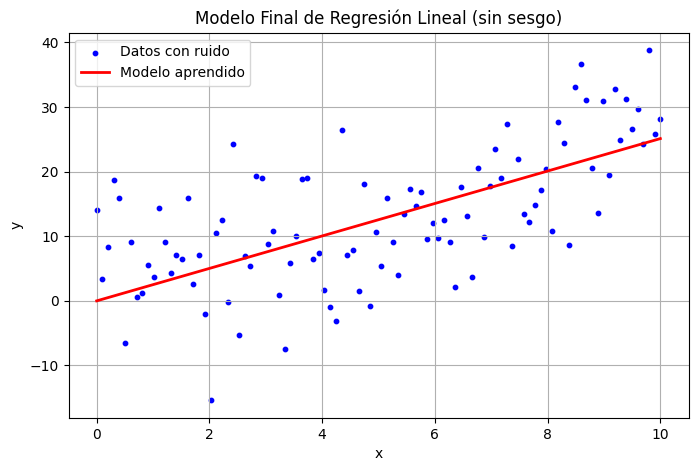

In [67]:
# 6. Graficar datos + modelo aprendido
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=10, label='Datos con ruido')
plt.plot(x, w * x, color='red', linewidth=2, label='Modelo aprendido')
plt.title('Modelo Final de Regresión Lineal (sin sesgo)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

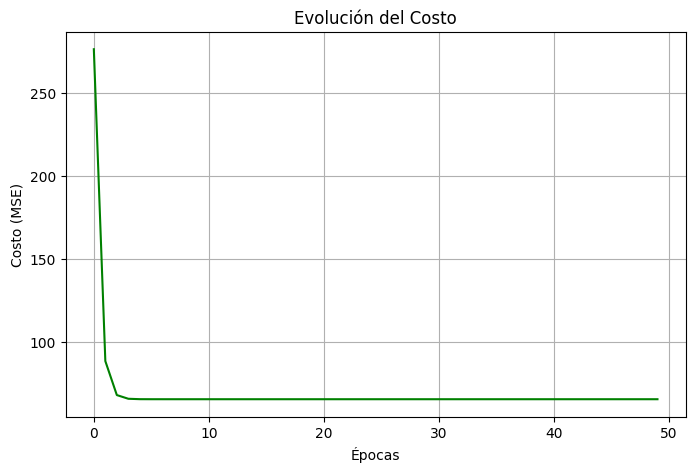

In [68]:
# 7. Graficar evolución del costo
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='green')
plt.title('Evolución del Costo')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.grid(True)
plt.show()

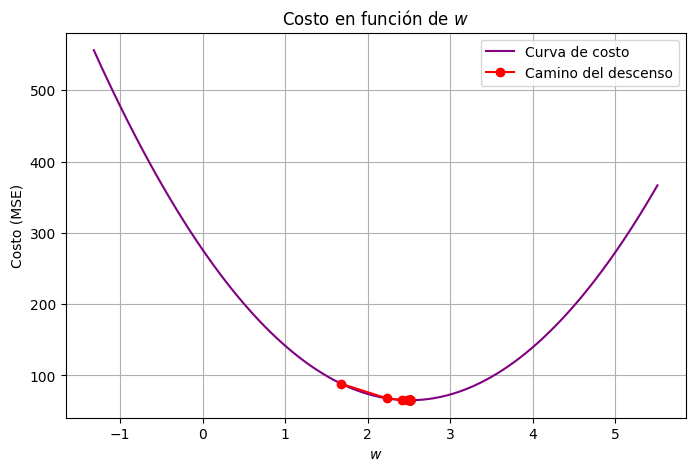

In [69]:
# 8. Graficar costo en función de w
w_vals = np.linspace(min(w_history)-3, max(w_history)+3, 100)  # Rango para w
Cost = []

# Calcular el costo para cada valor de w en w_vals
for w_val in w_vals:
    y_pred_val = w_val * x  # Predicción para este w
    Cost.append(mean_squared_error(y, y_pred_val))  # Calcular el costo

# Graficar la curva de costo en función de w
plt.figure(figsize=(8, 5))
plt.plot(w_vals, Cost, color='purple', label='Curva de costo')

# Graficar el camino del descenso (puntos de w y costo en cada época)
cost_history_for_w = [mean_squared_error(y, w * x) for w in w_history]

plt.plot(w_history, cost_history_for_w, marker='o', color='red', label='Camino del descenso')

plt.title('Costo en función de $w$')
plt.xlabel('$w$')
plt.ylabel('Costo (MSE)')
plt.legend()
plt.grid(True)
plt.show()

#**2. Hipotesis $$h(x) = w_{0} + w_{1}x$$**

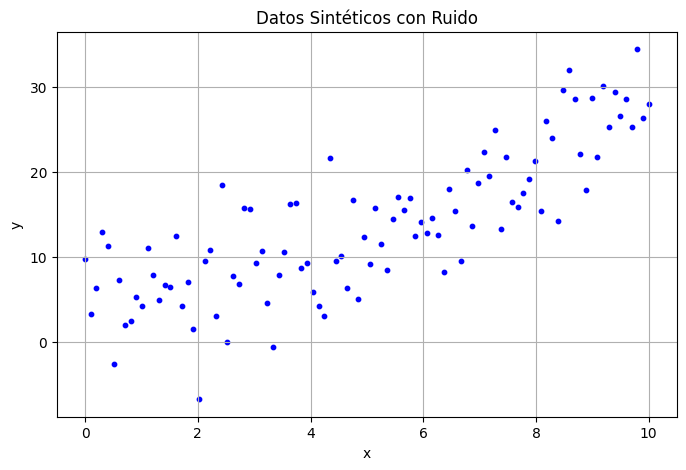

In [70]:
# 1. Generar datos sintéticos
np.random.seed(0)  # Para reproducibilidad

x = np.linspace(0, 10, 100)  # 100 puntos entre 0 y 10
true_w1 = 2.5
true_w0 = 1.0
noise = np.random.normal(0, 5, size=x.shape)  # Ruido gaussiano

y = true_w1 * x + true_w0 + noise

# Graficar los datos
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=10)
plt.title('Datos Sintéticos con Ruido')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [101]:
# 2. Inicializar parámetros
w_1 = 0.0  # Peso inicial
w_0 = 0.0  # Sesgo inicial

In [102]:
# 3. Hiperparámetros
learning_rate = 0.01
epochs = 1000
n = len(x)

In [103]:
# 4. Función de costo
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [104]:
# 5. Implementar descenso del gradiente
cost_history = []
w1_history = []
w0_history = []

for epoch in range(epochs):
    # Predicción
    y_pred = w_1 * x + w_0

    # Error
    error = y - y_pred

    # Gradientes
    dw_1 = (-2/n) * np.sum(x * error)
    dw_0 = (-2/n) * np.sum(error)

    # Actualización
    w_1 = w_1 - learning_rate * dw_1
    w_0 = w_0 - learning_rate * dw_0

    # Guardar historial
    cost = mean_squared_error(y, y_pred)
    cost_history.append(cost)
    w1_history.append(w_1)
    w0_history.append(w_0)

    # Mostrar cada 20 épocas
    if epoch % 20 == 0:
        print(f"Época {epoch}: w_1 = {w_1:.4f}, w_0 = {w_0:.4f}, Costo = {cost:.4f}")

print("\nResultado final:")
print(f"Modelo aprendido: y = {w_1:.2f}x + {w_0:.2f}")

Época 0: w_1 = 1.7797, w_0 = 0.2760, Costo = 262.6252
Época 20: w_1 = 2.5750, w_0 = 0.5548, Costo = 25.7751
Época 40: w_1 = 2.5538, w_0 = 0.6957, Costo = 25.6727
Época 60: w_1 = 2.5346, w_0 = 0.8233, Costo = 25.5888
Época 80: w_1 = 2.5173, w_0 = 0.9388, Costo = 25.5200
Época 100: w_1 = 2.5016, w_0 = 1.0433, Costo = 25.4636
Época 120: w_1 = 2.4873, w_0 = 1.1379, Costo = 25.4175
Época 140: w_1 = 2.4744, w_0 = 1.2236, Costo = 25.3796
Época 160: w_1 = 2.4628, w_0 = 1.3012, Costo = 25.3486
Época 180: w_1 = 2.4522, w_0 = 1.3714, Costo = 25.3232
Época 200: w_1 = 2.4427, w_0 = 1.4350, Costo = 25.3023
Época 220: w_1 = 2.4340, w_0 = 1.4925, Costo = 25.2853
Época 240: w_1 = 2.4262, w_0 = 1.5446, Costo = 25.2713
Época 260: w_1 = 2.4191, w_0 = 1.5917, Costo = 25.2598
Época 280: w_1 = 2.4127, w_0 = 1.6344, Costo = 25.2504
Época 300: w_1 = 2.4069, w_0 = 1.6731, Costo = 25.2427
Época 320: w_1 = 2.4016, w_0 = 1.7081, Costo = 25.2364
Época 340: w_1 = 2.3968, w_0 = 1.7397, Costo = 25.2312
Época 360: w_1 

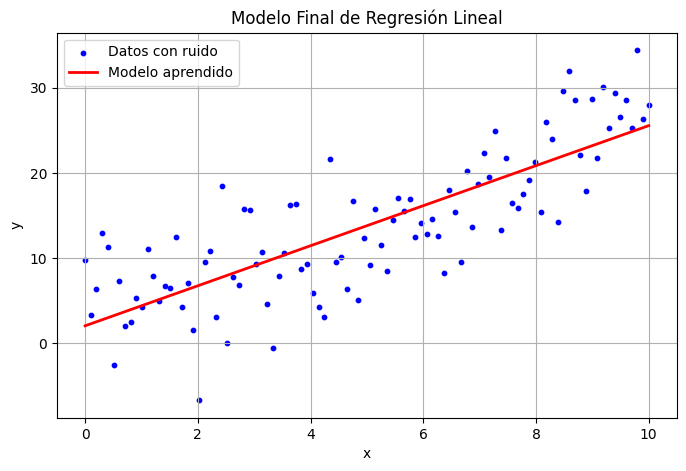

In [105]:
# 6. Graficar datos + modelo aprendido
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=10, label='Datos con ruido')
plt.plot(x, w_1*x + w_0, color='red', linewidth=2, label='Modelo aprendido')
plt.title('Modelo Final de Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## **¿Cómo evoluciono la función del costo?**

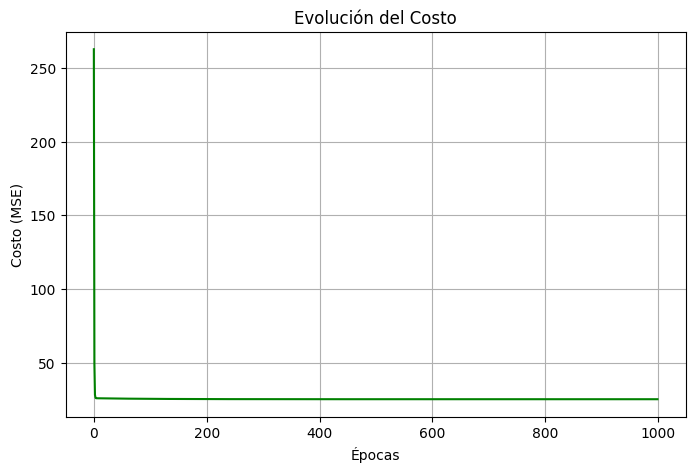

In [106]:
# 7. Graficar evolución del costo
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='green')
plt.title('Evolución del Costo')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.grid(True)
plt.show()

# **Función de Coste $$J(h(x))$$**

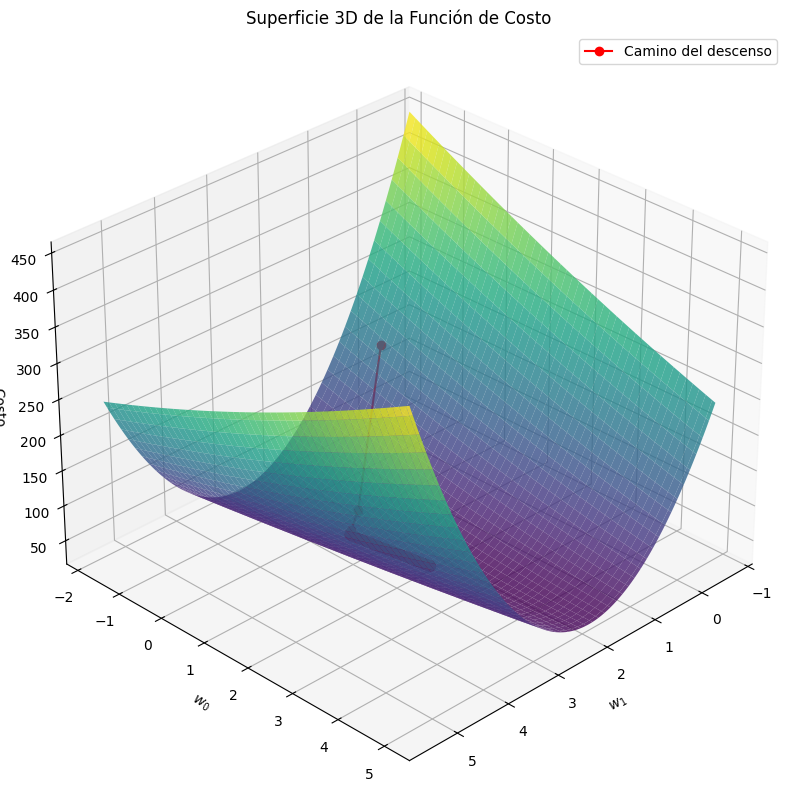

In [107]:
# Graficar superficie 3D del costo
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W1, W0, Cost, cmap='viridis', alpha=0.8, edgecolor='none')
ax.plot(w1_history, w0_history, cost_history, color='red', marker='o', label='Camino del descenso')

ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_0$')
ax.set_zlabel('Costo')
ax.set_title('Superficie 3D de la Función de Costo')
ax.view_init(elev=30, azim=45)

plt.legend()
plt.show()

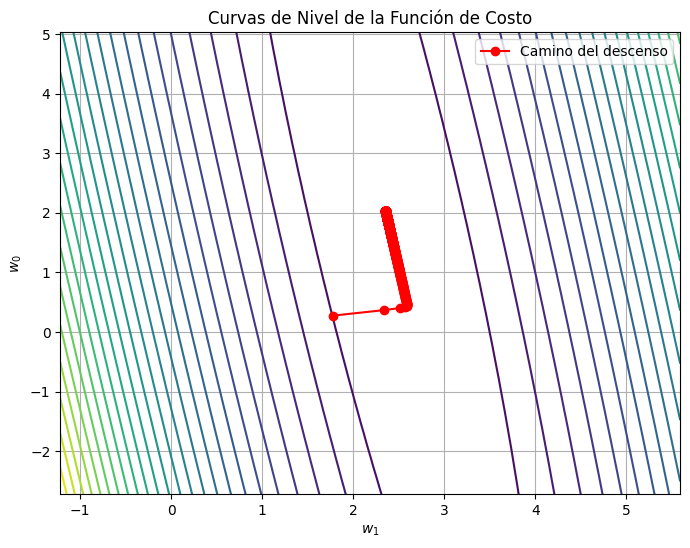

In [108]:
# Curvas de nivel del costo
w1_vals = np.linspace(min(w1_history)-3, max(w1_history)+3, 100)
w0_vals = np.linspace(min(w0_history)-3, max(w0_history)+3, 100)
W1, W0 = np.meshgrid(w1_vals, w0_vals)

Cost = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        y_pred_grid = W1[i, j] * x + W0[i, j]
        Cost[i, j] = mean_squared_error(y, y_pred_grid)

plt.figure(figsize=(8, 6))
plt.contour(W1, W0, Cost, levels=30, cmap='viridis')
plt.plot(w1_history, w0_history, marker='o', color='red', label='Camino del descenso')
plt.xlabel('$w_1$')
plt.ylabel('$w_0$')
plt.title('Curvas de Nivel de la Función de Costo')
plt.legend()
plt.grid(True)
plt.show()
